In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp  "/content/drive/My Drive/AML/Project/Data/Train_1_gram_prep.csv" .
!cp  "/content/drive/My Drive/AML/Project/Data/Validate_1_gram_prep.csv" .
!cp  "/content/drive/My Drive/AML/Project/Data/Train_2_gram_prep.csv" .
!cp  "/content/drive/My Drive/AML/Project/Data/Validate_2_gram_prep.csv" .
!cp  "/content/drive/My Drive/AML/Project/Data/Train_3_gram_prep.csv" .
!cp  "/content/drive/My Drive/AML/Project/Data/Validate_3_gram_prep.csv" .

## Load dataset and prepare training and validating data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# load datasets
train_data_1gram = pd.read_csv("Train_1_gram_prep.csv")
dev_data_1gram = pd.read_csv("Validate_1_gram_prep.csv")

train_data_2gram = pd.read_csv("Train_2_gram_prep.csv")
dev_data_2gram = pd.read_csv("Validate_2_gram_prep.csv")

train_data_3gram = pd.read_csv("Train_3_gram_prep.csv")
dev_data_3gram = pd.read_csv("Validate_3_gram_prep.csv")

# train & dev set
X_train_1gram = train_data_1gram.iloc[::,:-1].values
y_train_1gram = train_data_1gram["Label"].values
X_dev_1gram = dev_data_1gram.iloc[::,:-1].values
y_dev_1gram = dev_data_1gram["Label"].values

X_train_2gram = train_data_2gram.iloc[::,:-1].values
y_train_2gram = train_data_2gram["Label"].values
X_dev_2gram = dev_data_2gram.iloc[::,:-1].values
y_dev_2gram = dev_data_2gram["Label"].values

X_train_3gram = train_data_3gram.iloc[::,:-1].values
y_train_3gram = train_data_3gram["Label"].values
X_dev_3gram = dev_data_3gram.iloc[::,:-1].values
y_dev_3gram = dev_data_3gram["Label"].values

## Implementing Linear SVM

For each value of the regularization hyperparameter, we will train linear SVM model on each N-gram feature vectors on the train set, and compute its $F_1$-score on the dev set. The $F_1$-scores of each N-gram feature vector are plotted for each hyperparameter.

The regularization hyperparameters are chosen to be [0.01, 0.03, 0.09, 0.1, 0.15, 0.5, 1.0].

In [4]:
# Train a linear SVM model, for a variety of regularization hyperparameter values
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

hyper_para = [0.01, 0.03, 0.09, 0.1, 0.15, 0.5, 1.0]
lsvc_models =[]
for i in hyper_para:
    lsvc = LinearSVC(C=i)
    lsvc_models.append(lsvc)

def SVC_Linear(X_train, y_train, X_dev, y_dev, models, F1_lsvm):
  for i,model in enumerate(models):
      model.fit(X_train, y_train)
      predicted_lsvm = model.predict(X_dev)
      f1_lsvm = f1_score(y_dev, predicted_lsvm, average='binary')
      F1_lsvm.append(f1_lsvm)
      print("F1-score on the dev set (c=",hyper_para[i],"): ", f1_lsvm)

### 1-gram model

In [ ]:
F1_lsvm_1gram = []
SVC_Linear(X_train_1gram, y_train_1gram, X_dev_1gram, y_dev_1gram, lsvc_models, F1_lsvm_1gram)

F1-score on the dev set (c= 0.01 ):  0.8995193408102541
F1-score on the dev set (c= 0.03 ):  0.9102404877498025
F1-score on the dev set (c= 0.09 ):  0.9130531962449709
F1-score on the dev set (c= 0.1 ):  0.9131940565299966
F1-score on the dev set (c= 0.15 ):  0.9129175946547885
F1-score on the dev set (c= 0.5 ):  0.9102960671674767
F1-score on the dev set (c= 1.0 ):  0.9065637065637066


### 2-gram model

In [ ]:
F1_lsvm_2gram = []
SVC_Linear(X_train_2gram, y_train_2gram, X_dev_2gram, y_dev_2gram, lsvc_models, F1_lsvm_2gram)

F1-score on the dev set (c= 0.01 ):  0.9036020583190395
F1-score on the dev set (c= 0.03 ):  0.9110030532624676
F1-score on the dev set (c= 0.09 ):  0.9161723559037495
F1-score on the dev set (c= 0.1 ):  0.9155764284915577
F1-score on the dev set (c= 0.15 ):  0.9146681539319577
F1-score on the dev set (c= 0.5 ):  0.9110667553781326
F1-score on the dev set (c= 1.0 ):  0.9062569091311077


### 3-gram model

In [ ]:
F1_lsvm_3gram = []
SVC_Linear(X_train_3gram, y_train_3gram, X_dev_3gram, y_dev_3gram, lsvc_models, F1_lsvm_3gram)

F1-score on the dev set (c= 0.01 ):  0.9036240996913227
F1-score on the dev set (c= 0.03 ):  0.9113294928272901
F1-score on the dev set (c= 0.09 ):  0.9158648467218617
F1-score on the dev set (c= 0.1 ):  0.9159588734912829
F1-score on the dev set (c= 0.15 ):  0.9146300636089721
F1-score on the dev set (c= 0.5 ):  0.9112688553682343
F1-score on the dev set (c= 1.0 ):  0.9067815330240777


### Plot $F_1$-scores for tuning

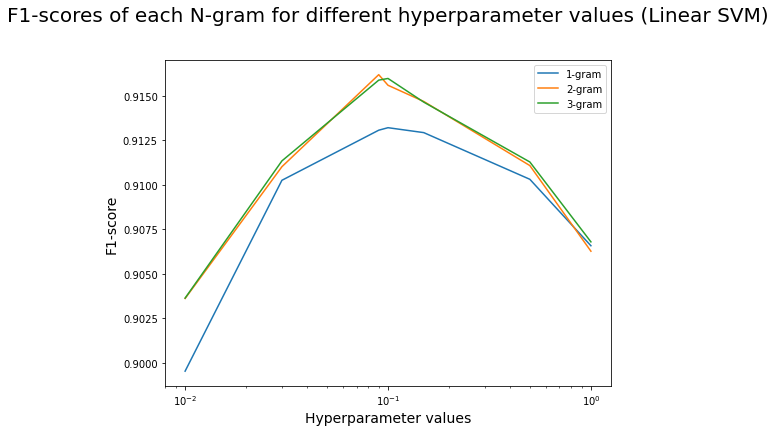

In [ ]:
# plot the F1-scores on the dev set of each N-gram for different hyperparameter values.
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,6))
plt.semilogx(hyper_para,F1_lsvm_1gram, label='1-gram')
plt.semilogx(hyper_para,F1_lsvm_2gram, label='2-gram')
plt.semilogx(hyper_para,F1_lsvm_3gram, label='3-gram')
plt.title('F1-scores of each N-gram for different hyperparameter values (Linear SVM)',fontsize = '20',y=1.1)
plt.xlabel('Hyperparameter values',fontsize = '14')
plt.ylabel('F1-score',fontsize = '14')
plt.legend(loc='best')
plt.show()

Best performance is achieved at 2-gram feature extraction with  regularization hyperparameter = 0.09, validation F1-score = 0.9161723559037495

## Implementing Kernelized SVM

For each value of the regularization hyperparameter, we will train non-linear SVM model with Gaussian kernel on each N-gram feature vectors on the train set, and compute its $F_1$-score on the dev set. The $F_1$-scores of each N-gram feature vector are plotted for each hyperparameter.

The regularization hyperparameters are chosen to be [0.01, 0.1, 1.0].

In [ ]:
# Train a kernalized SVM model, for a variety of regularization hyperparameter values
from sklearn.svm import SVC
from sklearn.metrics import f1_score

hyper_para = [0.01, 0.1, 1.0]
svc_models =[]
for i in hyper_para:
    svc = SVC(C=i)
    svc_models.append(svc)

def SVC_Kernel(X_train, y_train, X_dev, y_dev, models, F1_svm):
  for i,model in enumerate(models):
      model.fit(X_train, y_train)
      predicted_svm = model.predict(X_dev)
      f1_svm = f1_score(y_dev, predicted_svm, average='binary')
      F1_svm.append(f1_svm)
      print("F1-score on the dev set (c=",hyper_para[i],"): ", f1_svm)

### 1-gram model

In [ ]:
# F1_svm_1gram = []
# SVC_Kernel(X_train_1gram, y_train_1gram, X_dev_1gram, y_dev_1gram, svc_models, F1_svm_1gram)

### 2-gram model

In [ ]:
# F1_svm_2gram = []
# SVC_Kernel(X_train_2gram, y_train_2gram, X_dev_2gram, y_dev_2gram, svc_models, F1_svm_2gram)

### 3-gram model

In [ ]:
# F1_svm_3gram = []
# SVC_Kernel(X_train_3gram, y_train_3gram, X_dev_3gram, y_dev_3gram, svc_models, F1_svm_3gram)

### Plot $F_1$-scores for tuning

In [ ]:
# # plot the F1-scores on the dev set of each N-gram for different hyperparameter values.
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.figure(figsize=(8,6))
# plt.semilogx(hyper_para,F1_svm_1gram, label='1-gram')
# plt.semilogx(hyper_para,F1_svm_2gram, label='2-gram')
# plt.semilogx(hyper_para,F1_svm_3gram, label='3-gram')
# plt.title('F1-scores of each N-gram for different hyperparameter values (Kernelized SVM)',fontsize = '20',y=1.1)
# plt.xlabel('Hyperparameter values',fontsize = '14')
# plt.ylabel('F1-score',fontsize = '14')
# plt.legend(loc='best')
# plt.show()

Since it took unreasonably long time to train a SVM model with Gaussian kernel on our huge dataset (30000+ data points with 6000 features) and the performance may not be improved dramatically, we decided to skip this model and only train linear SVM model.

## Final Result

Overall, the best performance is achived at Linear SVM with 2-gram feature extraction, regularization hyperparameter = 0.09, validation F1-score = 0.9161723559037495

In [5]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

def best_SVC(X_train, y_train, X_dev, y_dev, model):
    model.fit(X_train, y_train)
    predicted_svm = model.predict(X_dev)
    f1 = f1_score(y_dev, predicted_svm, average='binary')
    precision = precision_score(y_dev, predicted_svm, average='binary')
    recall = recall_score(y_dev, predicted_svm, average='binary')
    accuracy = accuracy_score(y_dev, predicted_svm)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1-score: ", f1)
    print("Accuracy: ", accuracy)
    return model.coef_

# Linear SVM, 2-gram model, c=0.09
weights = best_SVC(X_train_2gram, y_train_2gram, X_dev_2gram, y_dev_2gram, LinearSVC(C=0.09))

Precision:  0.9474537037037037
Recall:  0.8868905742145179
F1-score:  0.9161723559037495
Accuracy:  0.9075422787310209


In [6]:
all_features = train_data_2gram.columns.values.tolist()[:-1]

In [7]:
weights = weights.reshape(6000,)
top_10_ind = weights.argsort()[::-1][:10]
top_10_features = []
for i in top_10_ind:
  top_10_features.append([all_features[i],weights[i]])
print("Top 10 important features and their weights:\n")
top_10_features

Top 10 important features and their weights:



[['bitch', 1.8400932164815136],
 ['pussy', 1.7448655622847755],
 ['faggot', 1.6499261568580328],
 ['hoe', 1.6184438875800422],
 ['fag', 1.5712059190600898],
 ['niggah', 1.5573591455936564],
 ['nigger', 1.5118083044350703],
 ['cunt', 1.4735025971918017],
 ['pussies', 1.4133108362808104],
 ['retard', 1.3856541190151075]]

In [8]:
top_10_features_name = []
top_10_features_weight = []
for i in top_10_ind:
  top_10_features_name.append(all_features[i])
  top_10_features_weight.append(weights[i])

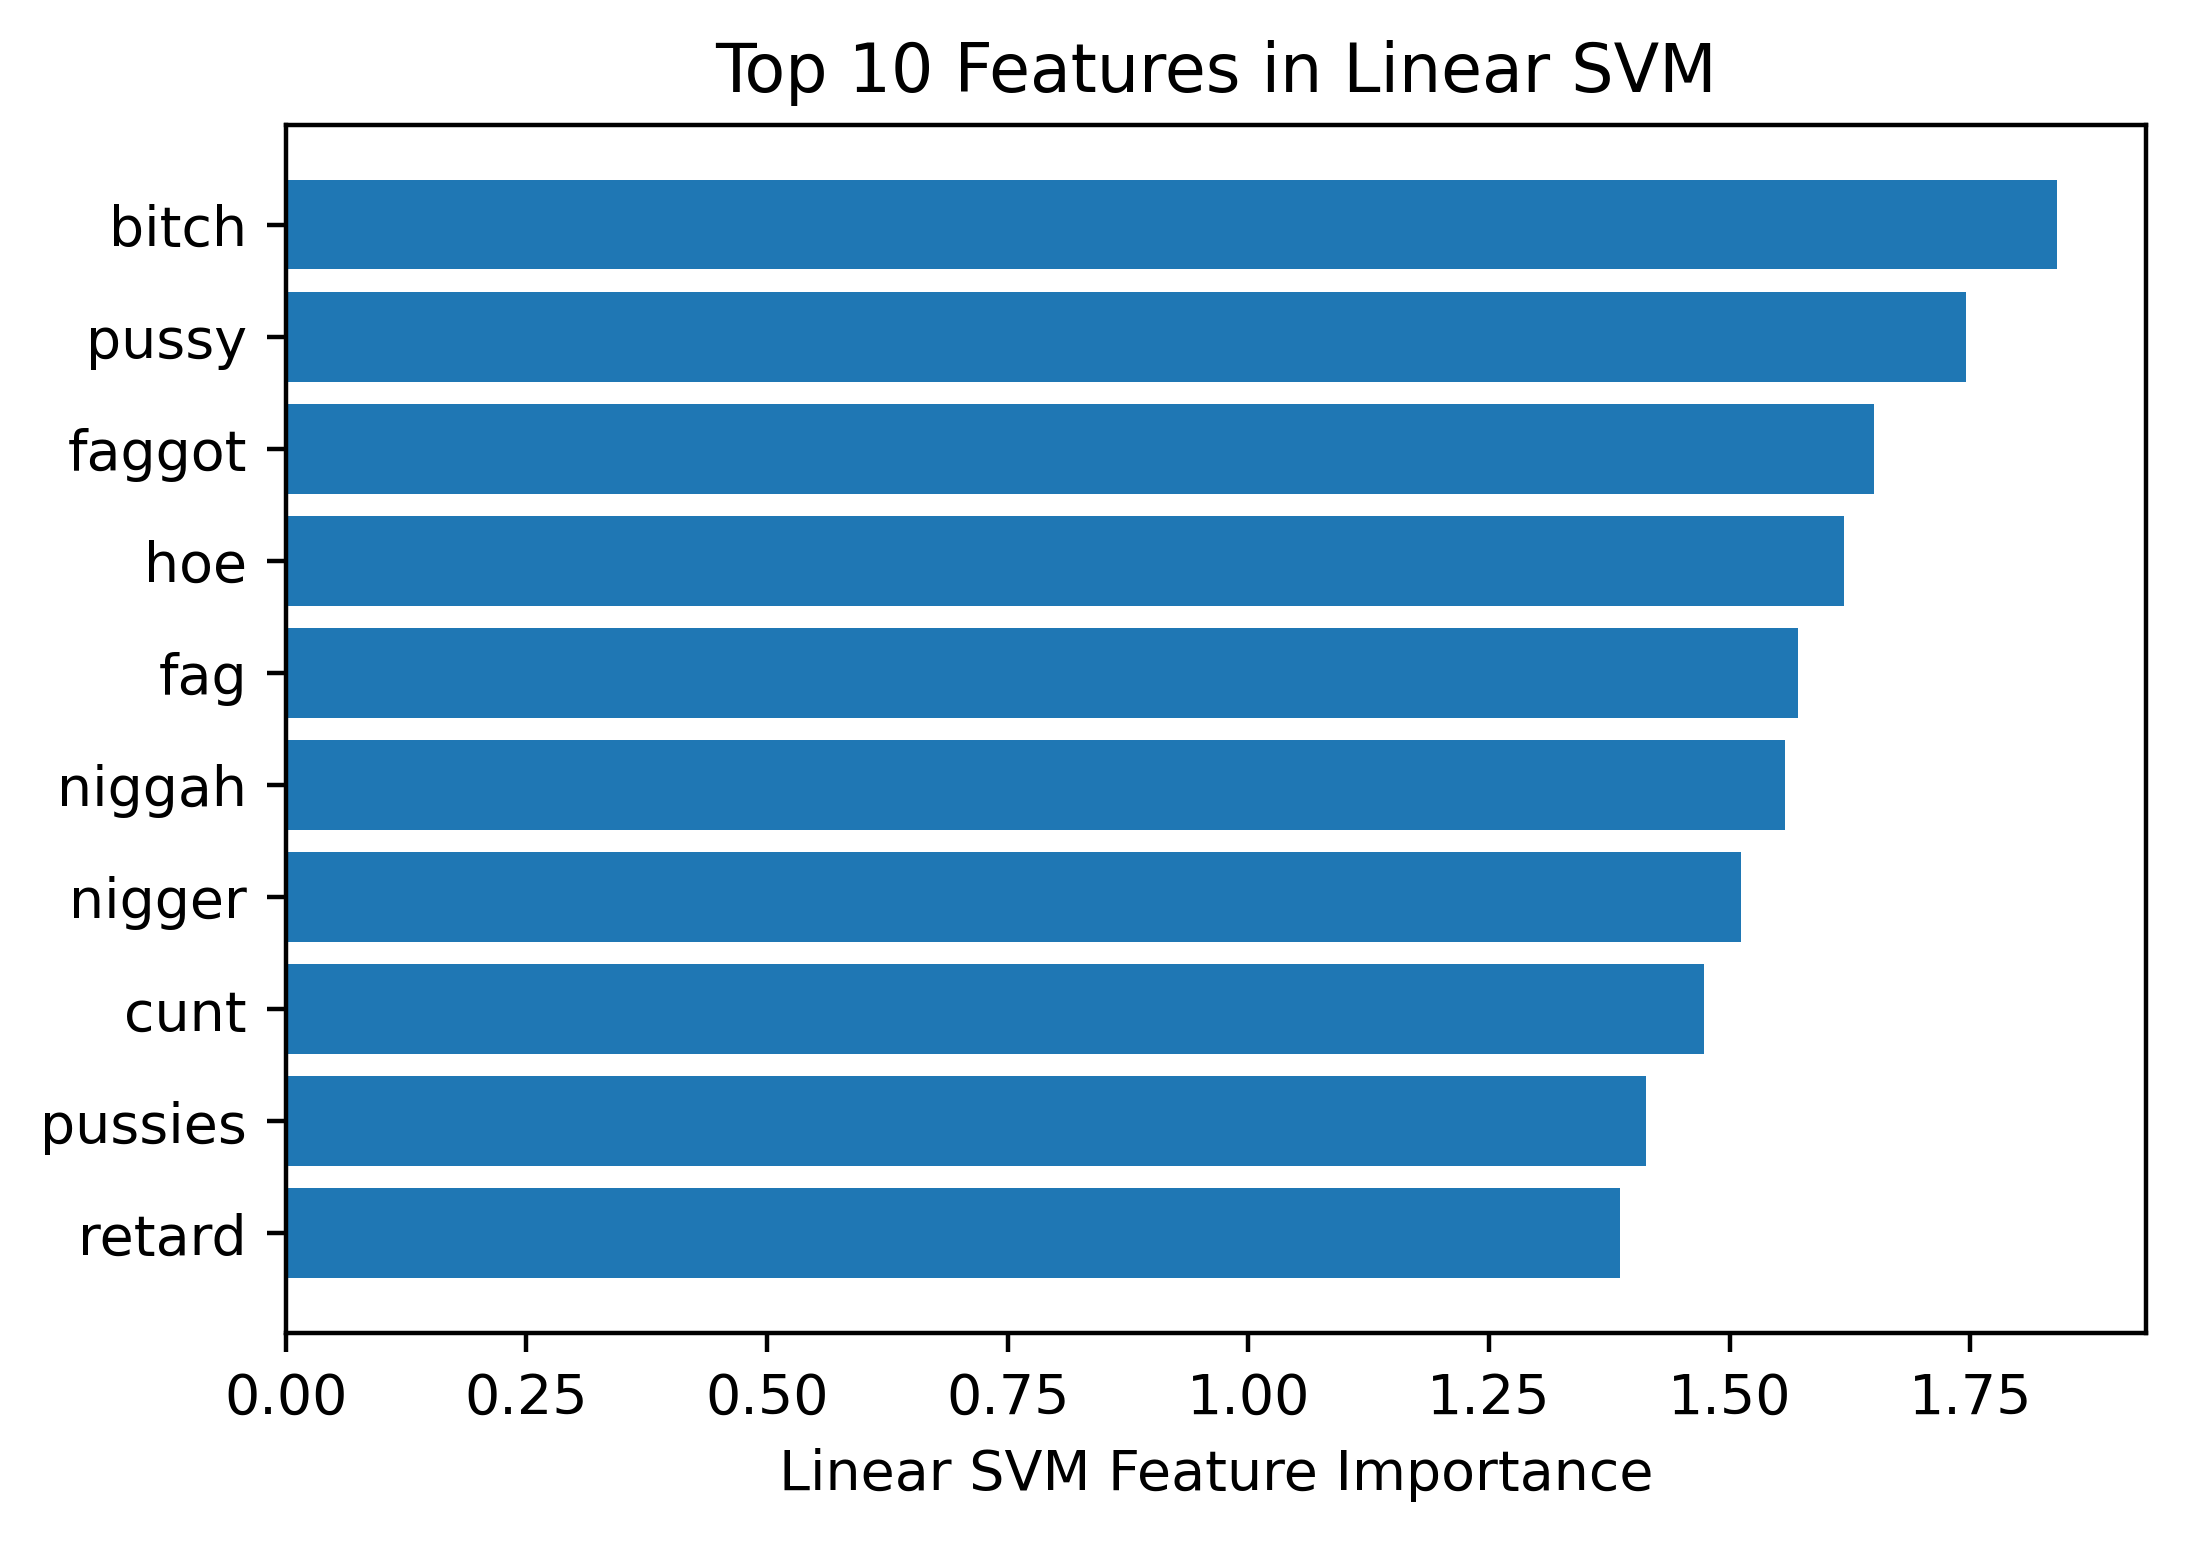

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(dpi = 400)

ax.barh(top_10_features_name, 
        top_10_features_weight)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Linear SVM Feature Importance')
ax.set_title('Top 10 Features in Linear SVM')
plt.show()